In [1]:
#Packages Used
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import readability

## Import Datasets

Datasets Used:

- OpenFoodFacts Product Dataset (2,168,141 rows x 191 columns)

- FoodDataCentral Branded Food Dataset (1,555,131 rows x 17 columns)

At the moment, empty product names are being filled in as "Unknown" to confirm whether further analysis is possible. Future lookup, either via website or database parsing, is required to verify identity.

- OpenFoodFacts Product Dataset (subset where country = United states) - 412,108 rows x 191 columns

In [2]:
OpenFoodFacts_Demo = pd.read_csv("OpenFoodFacts_Head_Demo.csv")
OpenFoodFacts_Demo.fillna({'product_name':"Unknown"}, inplace=True)
for i in OpenFoodFacts_Demo.columns.values:
    print(i)

Unnamed: 0
code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_en
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
food_groups
food_groups_tags
food_groups_en
states
st

In [ ]:
print(OpenFoodFacts_Demo["brands"])

In [ ]:
FoodDataCentral_Demo = pd.read_csv("FoodDataCentral_Head_Demo.csv")
print(FoodDataCentral_Demo)

In [3]:
#Get Readability Scores- Open Food Facts
readability_scores = []
for index, row in OpenFoodFacts_Demo.iterrows():
    if pd.isna(row["ingredients_text"]) or row["ingredients_text"] in ['🍎', "..."]:
        curr_record = (row['product_name'], row['code'], pd.NA,pd.NA,pd.NA)
        readability_scores.append(curr_record)
        print([i for i in curr_record])
    else:
        """Readability.getmeasures() automatically tokenizes the input by default and returns a set of readability measures. In this case,
        we are getting a specific measure from the set (flesch-kincaid) """
        curr_record = (row['code'], row['product_name'],readability.getmeasures(row["ingredients_text"])['readability grades']['Kincaid'],
                       readability.getmeasures(row["ingredients_text"])['readability grades']['FleschReadingEase'],
                       readability.getmeasures(row["ingredients_text"])['readability grades']['DaleChallIndex'],
                       readability.getmeasures(row["ingredients_text"])['sentence info']['words'],
                       readability.getmeasures(row["ingredients_text"])['sentence info']['complex_words_dc'])
        readability_scores.append(curr_record)
        print([i for i in curr_record])


readScores_OFF = pd.DataFrame(data = readability_scores, columns = ["code", "product_name",
                                                                    "Kincaid_Score","FleschReadingEase","DaleChallIndex",
                                                                    "num_words","complex_words_dc"])
readScores_OFF.to_csv("OpenFoodFacts_Readability.csv", sep=",")
for value in readScores_OFF.columns.values:
    OpenFoodFacts_Demo[value] = readScores_OFF[value]
    

[1, 'hyde icon', 49.85346534653465, -82.47009900990096, 21.153030693069304, 101, 80]
[4530, 'Banana Chips Sweetened (Whole)', 12.286666666666669, 33.690000000000026, 8.591166666666666, 15, 4]
[4559, 'Peanuts', 14.98090909090909, 26.841363636363653, 11.904972727272728, 22, 10]
[16087, 'Organic Salted Nut Mix', 14.656666666666666, 11.355000000000025, 14.758366666666666, 12, 8]
[16094, 'Organic Polenta', 14.690000000000001, -6.694999999999991, 19.5257, 2, 2]
[16100, 'Breadshop Honey Gone Nuts Granola', 14.040000000000003, 30.02500000000002, 16.471000000000004, 20, 15]
[16117, 'Organic Long Grain White Rice', 0.5199999999999996, 100.24000000000001, 7.0425, 5, 1]
[16124, 'Organic Muesli', 41.227999999999994, -22.410999999999973, 18.7021, 100, 64]
[16193, 'Organic Dark Chocolate Minis', 16.662105263157894, 9.4447368421053, 12.058373684210526, 19, 9]
[16513, 'Organic Sunflower Oil', 12.605000000000004, 18.940000000000033, 13.902050000000001, 8, 5]
[16612, 'Organic Adzuki Beans', 9.18000000000

[20047825, 'Apple Turnover', 22.31117647058824, -4.3397058823529235, 15.07554705882353, 34, 21]
[20048174, 'Pineapple Coconut Muffins', 18.772222222222222, 24.59500000000002, 13.3171, 36, 18]
[20048358, 'Assorted Strudel Bite', 21.237575757575758, 1.5763636363636593, 13.407542424242424, 33, 17]
[20048402, 'Freshly Baked Chocolat Croissant', 19.092121212121217, 16.958181818181835, 11.97208787878788, 33, 14]
[20048556, 'Cornbread', 21.27, 3.1250000000000213, 14.611135294117647, 34, 20]
[20049010, 'La Brea Bakery Ciabatta Loaf Freshly Baked In Store', 19.338709677419356, 11.628064516129037, 13.833132258064516, 31, 17]
[2044503, 'Belgian Choc Chip Waffle', 17.242307692307694, 17.75269230769233, 12.213792307692307, 26, 12]
[2046231, 'Chocolate Scone', 22.764516129032256, -12.933225806451581, 14.85184193548387, 31, 19]
[50413201, 'Naturally Flavored Beverage Enhancer With Other Natural Flavors', 17.975135135135137, 32.090810810810815, 14.433591891891894, 37, 21]
['Schwarzwälder Schinken', 64

[790320135, 'Fruit snack', 21.066666666666666, 8.145000000000003, 16.38737777777778, 36, 25]
[790350002, 'Candy crush, mixed fruit gummies, blue raspberry, green apple, lemon, cherry, orange, grape', 14.844137931034485, 40.2896551724138, 14.875589655172414, 29, 18]
[790350019, 'Candy crush, jelly fish, orange, grape, black cherry', 14.065384615384616, 40.52961538461541, 14.643023076923077, 26, 16]
[790350040, 'Hfb Candy, Candy Crush Color Bombs', 21.121951219512194, 16.65414634146343, 15.298148780487805, 41, 25]
[790350125, 'Candy crush, color bombs chocolate candy', 21.121951219512194, 16.65414634146343, 15.298148780487805, 41, 25]
[790350170, 'Candy crush, color bombs fun book', 21.121951219512194, 16.65414634146343, 15.298148780487805, 41, 25]
[790350187, 'Hfb Candy, Jelly Fish Candy', 14.065384615384616, 40.52961538461541, 14.643023076923077, 26, 16]
[790350378, 'Candy crush, fruit snacks, assorted', 18.294054054054055, 29.804324324324348, 15.287105405405406, 37, 23]
[790350385, 'A

In [ ]:
print(FoodDataCentral_Demo['ingredients'][2])

In [ ]:
print(OpenFoodFacts_Demo['ingredients_text'][1])

In [ ]:
#Readability scores example
for i in range(500):
    print(readability.getmeasures(FoodDataCentral_Demo.loc[i]['ingredients']))

In [ ]:
#Get Readability Scores- FoodData Central
readability_scores = []
for index, row in FoodDataCentral_Demo.iterrows():
    num_words = len(word_tokenize(row['ingredients']))
    if pd.isna(row["ingredients"]) or row["ingredients"] in ["---"]:
        curr_record = (row['fdc_id'], row['gtin_upc'], pd.NA,pd.NA)
        readability_scores.append(curr_record)
        
    else:
        """Readability.getmeasures() automatically tokenizes the input by default and returns a set of readability measures. In this case,
        we are getting a specific measure from the set (flesch-kincaid) """
        curr_record = (row['fdc_id'], row['gtin_upc'], row['branded_food_category'],readability.getmeasures(row["ingredients"])['readability grades']['Kincaid'],
                       readability.getmeasures(row["ingredients"])['readability grades']['FleschReadingEase'],
                       readability.getmeasures(row["ingredients"])['readability grades']['DaleChallIndex'],
                       readability.getmeasures(row["ingredients"])['sentence info']['words'],
                       readability.getmeasures(row["ingredients"])['sentence info']['complex_words_dc'])
        readability_scores.append(curr_record)
        

readScores_FDC = pd.DataFrame(data = readability_scores, columns = ["fdc_id", "gtin_upc","branded_food_category",
                                                                    "Kincaid_Score","FleschReadingEase","DaleChallIndex",
                                                                    "num_words","complex_words_dc"])
print(readScores_FDC.columns.values)
readScores_FDC.to_csv("FoodData_Central_Readability.csv", sep=",")
for value in readScores_FDC.columns.values:
    FoodDataCentral_Demo[value] = readScores_FDC[value]
    print(value)

In [ ]:
#Plot Mean Readability by Category
df = readScores_FDC.groupby(by="branded_food_category").mean()
print(df)
plt.scatter(df["num_words"], df['FleschReadingEase'])
plt.show()

In [ ]:
#Plot by Brand
df = FoodDataCentral_Demo.groupby(by="brand_owner").mean()
print(df['FleschReadingEase'])
plt.scatter(df["num_words"], df['FleschReadingEase'])
plt.show()

In [ ]:
series = pd.notnull(OpenFoodFacts_Demo['brands'])
df = OpenFoodFacts_Demo[series]

df = df.groupby(by = 'brands').mean()
print(df)
plt.scatter(df["num_words"], df['FleschReadingEase'])
plt.show()

In [ ]:
series = pd.notnull(OpenFoodFacts_Demo['brands'])
df = OpenFoodFacts_Demo[series]
df = df.groupby(by = 'brands').mean()
print(df)
plt.bar(list(df.index.values), df["complex_words_dc"])
plt.show()

In [6]:
OpenFoodFacts_Demo["complexWord_to_word_ratio"] = OpenFoodFacts_Demo['complex_words_dc']/OpenFoodFacts_Demo['num_words']

                                   Unnamed: 0     created_t  last_modified_t  \
brands                                                                         
Active foods                           1527.0  1.639985e+09     1.639985e+09   
Alter Eco                               313.0  1.489056e+09     1.545997e+09   
Angry Birds                            1361.0  1.489110e+09     1.577761e+09   
Annie's                                1586.0  1.591925e+09     1.600655e+09   
Astruc                                 1643.0  1.628508e+09     1.628508e+09   
...                                       ...           ...              ...   
Welch's,  Healthy Food Brands Llc      1341.5  1.489081e+09     1.565700e+09   
Wholesome,  Wholesome Sweeteners        183.0  1.489053e+09     1.517524e+09   
Wise Woodworks                          936.5  1.489078e+09     1.587589e+09   
Woodstock                               246.0  1.489056e+09     1.517526e+09   
kendall farms                          1

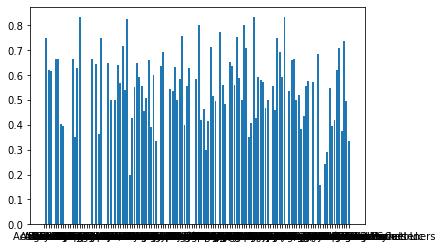

In [7]:
series = pd.notnull(OpenFoodFacts_Demo['brands'])
df = OpenFoodFacts_Demo[series]
df = df.groupby(by = 'brands').mean()
print(df)
plt.bar(list(df.index.values), df["complexWord_to_word_ratio"])
plt.show()